# 데이터 준비

In [52]:
import numpy as np
#농어의 길이로 무게를 예측하는 회귀

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
                         
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

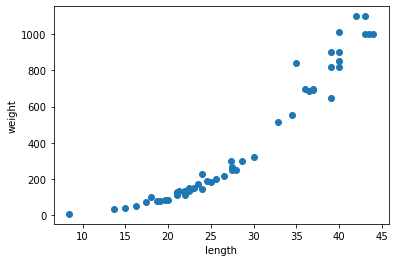

In [53]:
import matplotlib.pyplot as plt
plt.scatter(perch_length,perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
#농어의 길이가 커짐에 따라 무게도 늘어남

In [54]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)
#perch_length가 1차원배열이기 때문에 train_input과 test_input을 2차원 배열로 바꿔야 함

In [55]:

train_input.shape

(42,)

In [56]:
train_input = train_input.reshape(-1,1)#1쓰고 남은 숫자 = -1
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [57]:
train_input.shape

(42, 1)

In [58]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

knr.fit(train_input, train_target)

KNeighborsRegressor()

In [59]:
print(knr.score(test_input, test_target))

0.992809406101064


In [60]:
from sklearn.metrics import mean_absolute_error

#테스트 케이스에 대한 예측
test_prediction = knr.predict(test_input)

#테스트 세트에 대한 평균 절댓값 오차 계산
mae = mean_absolute_error(test_target, test_prediction)

In [61]:
print(mae)#예측이 평균적으로 19g 정도 타깃값과 다름

19.157142857142862


In [62]:
#과소적합: train<test
print(knr.score(train_input, train_target))

0.9698823289099254


In [63]:
#과소적합 해결위해 k를 줄임
knr.n_neighbors = 3

In [64]:
#모델을 다시 훈련함
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))#R^2 점수

0.9804899950518966


In [65]:
print(knr.score(test_input, test_targmnmet))

NameError: name 'test_targmnmet' is not defined

In [66]:
#과대적합과 과소적합을 이해하기 위한 문제
knr = KNeighborsRegressor()

In [67]:
x = np.arange(5,45).reshape(-1,1)

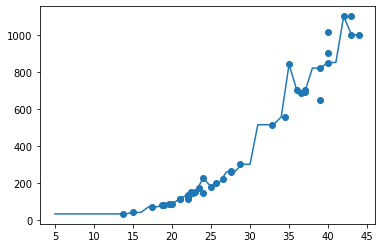

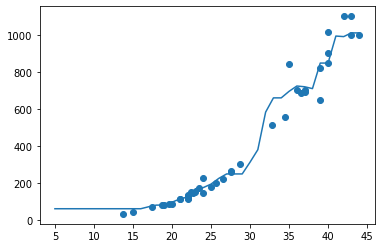

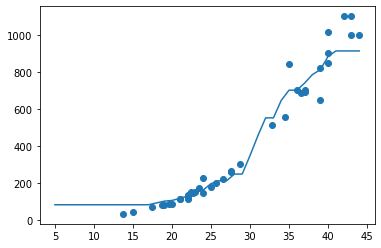

In [71]:
for n in [1,5,10]:
    knr.n_neighbors = n#문제1
    knr.fit(train_input, train_target)
    
    prediction = knr.predict(x)#문제2
    
    plt.scatter(train_input, train_target)
    plt.plot(x,prediction)
    plt.show()
    